In [68]:
import pyspark, pandas
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate() 
spark

In [235]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

plt.style.use('seaborn-colorblind')

%matplotlib inline

In [2]:
ca_df= spark.read.csv("./data/CAvideos.csv", header=True, inferSchema=True)
us_df= spark.read.csv("./data/USvideos.csv", header=True, inferSchema=True)

In [3]:
ca_df.toPandas().head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

  category_id              publish_time  \
0          10  2017-11-10T17:00:03.000Z   
1          23  2017-11-13T17:00:00.000Z   
2          23  2017-11-12T19:05:24.000Z   
3          24  2017-11-12T18:01:41.000Z   
4          10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  "Eminem"|"Walk"|"On"|"Water"|"Aftermath/Shady/...  17158579   787425   
1  "plush"|"bad unboxing"|"unboxing"|"fan mail"|"...   1014651   127794   
2  "racist superman"|"rudy"|"mancuso"|"king"|"bac...   3191434   146035   
3  "ryan"|"higa"|"higatv"|"nigahiga"|"i dare you"...   2095828   132239   
4  "edsheeran"|"ed sheeran"|"acoustic"|"live"|"co...  33523622  1634130   

  dislikes comment_count                                  thumbnail_link  \
0    43420        125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1     1688         13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2     5339          8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3     1989         17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4    21082         85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

  comments_disabled ratings_disabled video_error_or_removed  \
0             False            False                  False   
1             False            False                  False   
2             False            False                  False   
3             False            False                  False   
4             False            False                  False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [5]:
print("Default schema as inferred by spark:")
ca_df.printSchema()

Default schema as inferred by spark:
root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [6]:
from pyspark.sql.types import StructType, StructField, TimestampType, StringType, BooleanType, DoubleType, IntegerType
schema1 = StructType([
    StructField("video_id", StringType(), True),
    StructField("trending_date", StringType(), True),
    StructField("title", StringType(), True),
    StructField("channel_title", StringType(), True),
    StructField("category_id", IntegerType(), True),
    StructField("publish_time", TimestampType(), True),
    StructField("tags", StringType(), True),
    StructField("views", IntegerType(), True),
    StructField("likes", IntegerType(), True),
    StructField("dislikes", IntegerType(), True),
    StructField("comment_count", IntegerType(), True),
    StructField("thumbnail_link", StringType(), True),
    StructField("comments_disabled", BooleanType(), True),
    StructField("ratings_disabled", BooleanType(), True),
    StructField("video_error_or_removed", BooleanType(), True),
    StructField("description", StringType(), True)])

In [7]:
ca_df= spark.read.csv("./data/CAvideos.csv",  schema=schema1, header=True, inferSchema=True)
us_df= spark.read.csv("./data/USvideos.csv",  schema=schema1,header=True, inferSchema=True)
fr_df= spark.read.csv("./data/FRvideos.csv", schema=schema1, header=True, inferSchema=True)
in_df= spark.read.csv("./data/INvideos.csv", schema=schema1, header=True, inferSchema=True)
gb_df= spark.read.csv("./data/GBvideos.csv", schema=schema1, header=True, inferSchema=True)


In [8]:
ca_df.printSchema()

new schema
root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- description: string (nullable = true)



In [9]:
ca_df.count()

45560

In [10]:
us_df.count()

48137

In [11]:
import pyspark.sql.functions
from pyspark.sql.functions import col,min, max

In [12]:
ca_df.select('category_id').groupby('category_id').count().orderBy('count',ascending=False).show(5)
us_df.select('category_id').groupby('category_id').count().orderBy('count',ascending=False).show(5)
fr_df.select('category_id').groupby('category_id').count().orderBy('count',ascending=False).show(5)
gb_df.select('category_id').groupby('category_id').count().orderBy('count',ascending=False).show(5)
in_df.select('category_id').groupby('category_id').count().orderBy('count',ascending=False).show(5)

+-----------+-----+
|category_id|count|
+-----------+-----+
|         24|13451|
|       null| 4679|
|         25| 4159|
|         22| 4105|
|         23| 3773|
+-----------+-----+
only showing top 5 rows

+-----------+-----+
|category_id|count|
+-----------+-----+
|         24| 9964|
|       null| 7188|
|         10| 6472|
|         26| 4146|
|         23| 3457|
+-----------+-----+
only showing top 5 rows

+-----------+-----+
|category_id|count|
+-----------+-----+
|         24| 9819|
|         22| 5719|
|       null| 5414|
|         23| 4343|
|         17| 4342|
+-----------+-----+
only showing top 5 rows

+-----------+-----+
|category_id|count|
+-----------+-----+
|         10|13754|
|         24| 9124|
|       null| 4379|
|         22| 2926|
|          1| 2577|
+-----------+-----+
only showing top 5 rows

+-----------+-----+
|category_id|count|
+-----------+-----+
|         24|16712|
|         25| 5241|
|         10| 3858|
|         23| 3429|
|         22| 2624|
+-----------+-----+


# In countries like Canada, USA, France and India, category "Entertainment" has the maximum no of trending videos. But in Great Britain, "Music" is the most watched category.

In [13]:
ca_df.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).show(5, truncate=False)
us_df.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).show(5, truncate=False)
fr_df.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).show(5, truncate=False)
gb_df.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).show(5, truncate=False)
in_df.select('channel_title').groupby('channel_title').count().orderBy('count',ascending=False).show(5, truncate=False)

+---------------+-----+
|channel_title  |count|
+---------------+-----+
|null           |4239 |
|SET India      |192  |
|MSNBC          |189  |
|FBE            |188  |
|The Young Turks|186  |
+---------------+-----+
only showing top 5 rows

+--------------------------------------+-----+
|channel_title                         |count|
+--------------------------------------+-----+
|null                                  |6025 |
|ESPN                                  |203  |
|The Tonight Show Starring Jimmy Fallon|197  |
|Netflix                               |193  |
|TheEllenShow                          |193  |
+--------------------------------------+-----+
only showing top 5 rows

+----------------+-----+
|channel_title   |count|
+----------------+-----+
|null            |5032 |
|Troom Troom FR  |195  |
|Elhiwar Ettounsi|181  |
|sam zirah       |173  |
|Lama Faché      |171  |
+----------------+-----+
only showing top 5 rows

+--------------------------------------+-----+
|channel_title

In [14]:
# !pip install --upgrade google-api-python-client
# !pip install oauth2client


In [1]:
from data_fetch import youtube_search
import pandas as pd

In [138]:

data1 = json.load(open('./corona_USMar7.json'))
df1= pd.DataFrame(data1['items'])
df1['trendDate']= pd.to_datetime("2020-03-07")

data2 = json.load(open('./corona_USMar9.json'))
df2= pd.DataFrame(data2['items'])
df2['trendDate']= pd.to_datetime("2020-03-09")

data3 = json.load(open('./corona_USMar11.json'))
df3= pd.DataFrame(data3['items'])
df3['trendDate']= pd.to_datetime("2020-03-11")

data4 = json.load(open('./corona_USMar13.json'))
df4= pd.DataFrame(data4['items'])
df4['trendDate']= pd.to_datetime("2020-03-13")

data5 = json.load(open('./corona_USMar15.json'))
df5= pd.DataFrame(data5['items'])
df5['trendDate']= pd.to_datetime("2020-03-15")

data6 = json.load(open('./corona_USMar17.json'))
df6= pd.DataFrame(data6['items'])
df6['trendDate']= pd.to_datetime("2020-03-17")

data7 = json.load(open('./corona_USMar20.json'))
df7= pd.DataFrame(data7['items'])
df7['trendDate']= pd.to_datetime("2020-03-20")

data8 = json.load(open('./corona_USMar23.json'))
df8= pd.DataFrame(data8['items'])
df8['trendDate']= pd.to_datetime("2020-03-23")

data9 = json.load(open('./corona_USMar25.json'))
df9= pd.DataFrame(data9['items'])
df9['trendDate']= pd.to_datetime("2020-03-25")

df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9], axis=0)
df.head()

kind                                               etag  \
0  youtube#video  "SJZWTG6xR0eGuCOh2bX6w3s4F94/5eIA1F_yjlkGOb494...   
1  youtube#video  "SJZWTG6xR0eGuCOh2bX6w3s4F94/_ZNQYOdjjjxkzLAfp...   
2  youtube#video  "SJZWTG6xR0eGuCOh2bX6w3s4F94/bLUEZDX8dcV_jZa7Z...   
3  youtube#video  "SJZWTG6xR0eGuCOh2bX6w3s4F94/RsHnumxNQFvR-T45m...   
4  youtube#video  "SJZWTG6xR0eGuCOh2bX6w3s4F94/anKRSUOctHmyk3jQ7...   

            id                                            snippet  \
0  yXWw0_UfSFg  {'publishedAt': '2020-03-07T21:00:00.000Z', 'c...   
1  NQDe5dNoNog  {'publishedAt': '2020-03-07T19:03:35.000Z', 'c...   
2  6kYlkcNS4qw  {'publishedAt': '2020-03-06T20:05:27.000Z', 'c...   
3  jB4FUHHMI24  {'publishedAt': '2020-03-07T08:35:00.000Z', 'c...   
4  k6bwOZW15gM  {'publishedAt': '2020-03-06T15:00:06.000Z', 'c...   

                                          statistics  trendDate contentDetails  
0  {'viewCount': '4197524', 'likeCount': '499455'... 2020-03-07            NaN  
1  {'viewCount': '1335021', 'likeCount': '166664'... 2020-03-07            NaN  
2  {'viewCount': '4980315', 'likeCount': '392258'... 2020-03-07            NaN  
3  {'viewCount': '1008537', 'likeCount': '26676',... 2020-03-07            NaN  
4  {'viewCount': '4245505', 'likeCount': '188810'... 2020-03-07            NaN

In [139]:
df['title']= df['snippet'].apply(lambda x : x.get('title'))
df['description']= df['snippet'].apply(lambda x : x.get('description'))
df['tags']= df['snippet'].apply(lambda x : x.get('tags') if 'tags' in x.keys() else [])

df['viewCount']= df['statistics'].apply(lambda x : x.get('viewCount'))
df['likeCount']= df['statistics'].apply(lambda x : x.get('likeCount'))
df['dislikeCount']= df['statistics'].apply(lambda x : x.get('dislikeCount'))
df['commentCount']= df['statistics'].apply(lambda x : x.get('commentCount'))

df['publishedDate']= df['snippet'].apply(lambda x : x.get('publishedAt'))
df['publishedDate']= pd.to_datetime(df['publishedDate']).dt.date

df.drop(['kind','etag','statistics', 'snippet','contentDetails'],axis=1, inplace=True)
df.rename(columns={"id": "videoId"},inplace=True)
df.head()

videoId  trendDate                                              title  \
0  yXWw0_UfSFg 2020-03-07    Anything You Can Fit In The Circle I’ll Pay For   
1  NQDe5dNoNog 2020-03-07           Our tour went wrong in all the best ways   
2  6kYlkcNS4qw 2020-03-07                       Addressing My Weight Gain...   
3  jB4FUHHMI24 2020-03-07  Neil deGrasse Tyson On Coronavirus: Will Peopl...   
4  k6bwOZW15gM 2020-03-07                                         Baby Pluto   

                                         description  \
0  Watch until the end to see how much i spent\nN...   
1  The best time with the best buds\nTickets to S...   
2  NEW Merch :) https://www.shanedawsonmerch.com\...   
3  America's favorite astrophysicist, who hosts "...   
4  Provided to YouTube by Generation Now/Atlantic...   

                                                tags viewCount likeCount  \
0                                                 []   4197524    499455   
1  [jaiden, animations, jaidenanimation, jaidenan...   1335021    166664   
2  [shane dawson, jeffree star, journalism, inves...   4980315    392258   
3  [The Late Show, Late Show, Stephen Colbert, St...   1008537     26676   
4          [Lil Uzi Vert, Eternal Atake, Baby Pluto]   4245505    188810   

  dislikeCount commentCount publishedDate  
0         2835        24836    2020-03-07  
1          917        16758    2020-03-07  
2         9385        32301    2020-03-06  
3          988         3606    2020-03-07  
4         6887        17621    2020-03-06

In [196]:
grp= df[df['description'].str.contains('corona|covid|virus|pandemic',case=False)].groupby(['trendDate'])

In [213]:
visual1 = grp['videoId'].count()
visual1

trendDate
2020-03-07    17
2020-03-09    18
2020-03-11    19
2020-03-13    25
2020-03-15    37
2020-03-17    40
2020-03-20    44
2020-03-23    50
2020-03-25    49
Name: videoId, dtype: int64

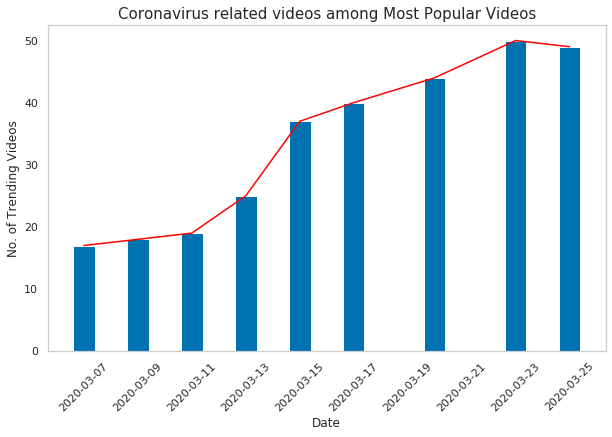

In [273]:
plt.figure(figsize=(10,6))
plt.bar(visual1.index, visual1,align='center')
plt.grid(False)
plt.ylabel('No. of Trending Videos')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(visual1.index,visual1,c="red")
plt.title('Coronavirus related videos among Most Popular Videos',fontsize=15)
plt.show();
